## 1. Dice simulations (*)

Simulations of one die,  

&nbsp; a) Calculate theoretical mean of a dice (six-sided) (*)

&nbsp; b) Now do simulations of

- 10
- 100
- 1000
- 10000
- 100000
- 1000000
- 10000000

number of dices and plot their means. (*)

<details>

<summary>Answer </summary>

a)
```
3.5
```

b) 

<img src="../Assets/numpy_1b.png" width = 300>

</details>




For one dice the mean is: 3.5
For 10 dice throws the mean is: 2.9
For 100 dice throws the mean is: 3.64
For 1,000 dice throws the mean is: 3.447
For 10,000 dice throws the mean is: 3.5072
For 100,000 dice throws the mean is: 3.50103
For 1,000,000 dice throws the mean is: 3.500965
For 10,000,000 dice throws the mean is: 3.4992669


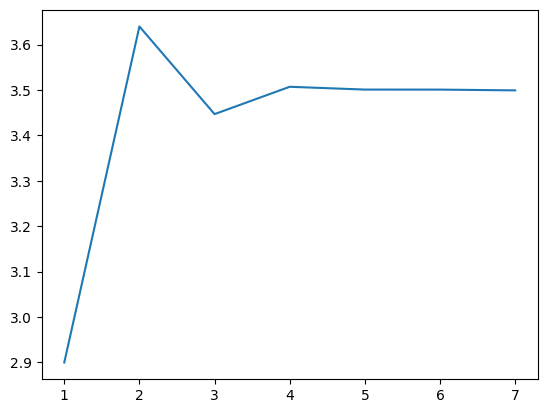

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

faces_of_dice = [1,2,3,4,5,6]
dice_array = np.array(faces_of_dice)
print(f"For one dice the mean is: {np.mean(dice_array)}")

n=7
means = []

for i in range(1,n+1):
    faces_when_thrown = []
    for j in range(10**i):
        faces_when_thrown.append(random.randint(1,6))
    means.append(np.mean(faces_when_thrown))
    print(f"For {10**i:,} dice throws the mean is: {means[i-1]}")

plt.plot(range(1,n+1),means)

--- 
## 2. Several dices (**)

&nbsp; a) Make a sample space for the sum of two dices, i.e. all possible outcomes of these dices. (*)

&nbsp; b) Count the number of each values in the sample space (*)

&nbsp; c) Now calculate the frequency $f_i$ for each unique value. Also check that the sum of frequencies sums to 1, i.e. $\sum_i f_i = 1$. (*)

&nbsp; d) Make a bar chart of the sum of two dices, with frequencies in y and unique values in x. This is a probability distribution of the sum of your two dices. (*)

&nbsp; e) Now make barplots in subplots of sum of dices for 1 dice, 2 dices, 3 dices and 4 dices. What is the pattern that you see? (**)

<details>

<summary>Hint</summary>

a) 

Here are some potentially useful methods:

```py

np.meshgrid(), np.add.reduce(), np.unique()

```

c)

Divide by the total number of outcomes


</details>

<details>

<summary>Answer</summary>


a) 

Sample space

```
[[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]
```

b) 

Unique values:
```
[ 2  3  4  5  6  7  8  9 10 11 12]
```

Count: 
```
[1 2 3 4 5 6 5 4 3 2 1]
```

c)

```
[0.028 0.056 0.083 0.111 0.139 0.167 0.139 0.111 0.083 0.056 0.028]
```

d) 


<img src="../Assets/numpy2d.png" width = 300>


e) 

<img src="../Assets/numpy2e.png" width = 500>


We see that when we sum several uniformly distributed random variables we will approach the normal distribution. This is called the central limit theorem, which we will come back to in the statistics course.

</details>

In [2]:
import numpy as np
from collections import Counter

dice1 = np.array([1,2,3,4,5,6])
dice2 = np.array([1,2,3,4,5,6])

# Asked chatGPT how to do this
grid1, grid2 = np.meshgrid(dice1, dice2)

print(grid1)
print(grid2)

combinations = np.vstack((grid1.ravel(), grid2.ravel())).T
sums = np.sum(combinations, axis=1)

count_occurrences2 = Counter(sums)

print(count_occurrences2)

[[1 2 3 4 5 6]
 [1 2 3 4 5 6]
 [1 2 3 4 5 6]
 [1 2 3 4 5 6]
 [1 2 3 4 5 6]
 [1 2 3 4 5 6]]
[[1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [4 4 4 4 4 4]
 [5 5 5 5 5 5]
 [6 6 6 6 6 6]]
[[1 1]
 [2 1]
 [3 1]
 [4 1]
 [5 1]
 [6 1]
 [1 2]
 [2 2]
 [3 2]
 [4 2]
 [5 2]
 [6 2]
 [1 3]
 [2 3]
 [3 3]
 [4 3]
 [5 3]
 [6 3]
 [1 4]
 [2 4]
 [3 4]
 [4 4]
 [5 4]
 [6 4]
 [1 5]
 [2 5]
 [3 5]
 [4 5]
 [5 5]
 [6 5]
 [1 6]
 [2 6]
 [3 6]
 [4 6]
 [5 6]
 [6 6]]
[ 2  3  4  5  6  7  3  4  5  6  7  8  4  5  6  7  8  9  5  6  7  8  9 10
  6  7  8  9 10 11  7  8  9 10 11 12]
Counter({7: 6, 6: 5, 8: 5, 5: 4, 9: 4, 4: 3, 10: 3, 3: 2, 11: 2, 2: 1, 12: 1})


In [3]:
total_dice_throws = 0

for key, count in count_occurrences2.items():
    total_dice_throws += count

frequency_dict2 = {}

# Calculate and add frequencies for each key
for key, count in count_occurrences2.items():
    frequency = count / total_dice_throws
    frequency_dict2[key] = frequency

frequency_sum = 0
for value in frequency_dict2.values():
    frequency_sum += value
print(f"Sum of all frequencies: {frequency_sum}")

Sum of all frequencies: 1.0000000000000002


In [4]:
import numpy as np
from collections import Counter

dice = np.array([1,2,3,4,5,6])

grid1, grid2, grid3 = np.meshgrid(dice, dice, dice)

print(grid1)
print(grid2)

combinations = np.vstack((grid1.ravel(), grid2.ravel(), grid3.ravel())).T

sums = np.sum(combinations, axis=1)
count_occurrences3 = Counter(sums)

total_dice_throws = 0

for key, count in count_occurrences3.items():
    total_dice_throws += count

frequency_dict3 = {}

# Calculate and add frequencies for each key
for key, count in count_occurrences3.items():
    frequency = count / total_dice_throws
    frequency_dict3[key] = frequency

# 'frequency_dict' now contains the frequencies of each unique sum
print(frequency_dict3)

frequency_sum = 0
for value in frequency_dict3.values():
    frequency_sum += value
print(f"Sum of all frequencies: {frequency_sum}")



[[[1 1 1 1 1 1]
  [2 2 2 2 2 2]
  [3 3 3 3 3 3]
  [4 4 4 4 4 4]
  [5 5 5 5 5 5]
  [6 6 6 6 6 6]]

 [[1 1 1 1 1 1]
  [2 2 2 2 2 2]
  [3 3 3 3 3 3]
  [4 4 4 4 4 4]
  [5 5 5 5 5 5]
  [6 6 6 6 6 6]]

 [[1 1 1 1 1 1]
  [2 2 2 2 2 2]
  [3 3 3 3 3 3]
  [4 4 4 4 4 4]
  [5 5 5 5 5 5]
  [6 6 6 6 6 6]]

 [[1 1 1 1 1 1]
  [2 2 2 2 2 2]
  [3 3 3 3 3 3]
  [4 4 4 4 4 4]
  [5 5 5 5 5 5]
  [6 6 6 6 6 6]]

 [[1 1 1 1 1 1]
  [2 2 2 2 2 2]
  [3 3 3 3 3 3]
  [4 4 4 4 4 4]
  [5 5 5 5 5 5]
  [6 6 6 6 6 6]]

 [[1 1 1 1 1 1]
  [2 2 2 2 2 2]
  [3 3 3 3 3 3]
  [4 4 4 4 4 4]
  [5 5 5 5 5 5]
  [6 6 6 6 6 6]]]
[[[1 1 1 1 1 1]
  [1 1 1 1 1 1]
  [1 1 1 1 1 1]
  [1 1 1 1 1 1]
  [1 1 1 1 1 1]
  [1 1 1 1 1 1]]

 [[2 2 2 2 2 2]
  [2 2 2 2 2 2]
  [2 2 2 2 2 2]
  [2 2 2 2 2 2]
  [2 2 2 2 2 2]
  [2 2 2 2 2 2]]

 [[3 3 3 3 3 3]
  [3 3 3 3 3 3]
  [3 3 3 3 3 3]
  [3 3 3 3 3 3]
  [3 3 3 3 3 3]
  [3 3 3 3 3 3]]

 [[4 4 4 4 4 4]
  [4 4 4 4 4 4]
  [4 4 4 4 4 4]
  [4 4 4 4 4 4]
  [4 4 4 4 4 4]
  [4 4 4 4 4 4]]

 [[5 5 5 5 5 5]
  [5

[[1 1 1 1]
 [1 1 1 2]
 [1 1 1 3]
 ...
 [6 6 6 4]
 [6 6 6 5]
 [6 6 6 6]]
Sum of all frequencies: 1.0


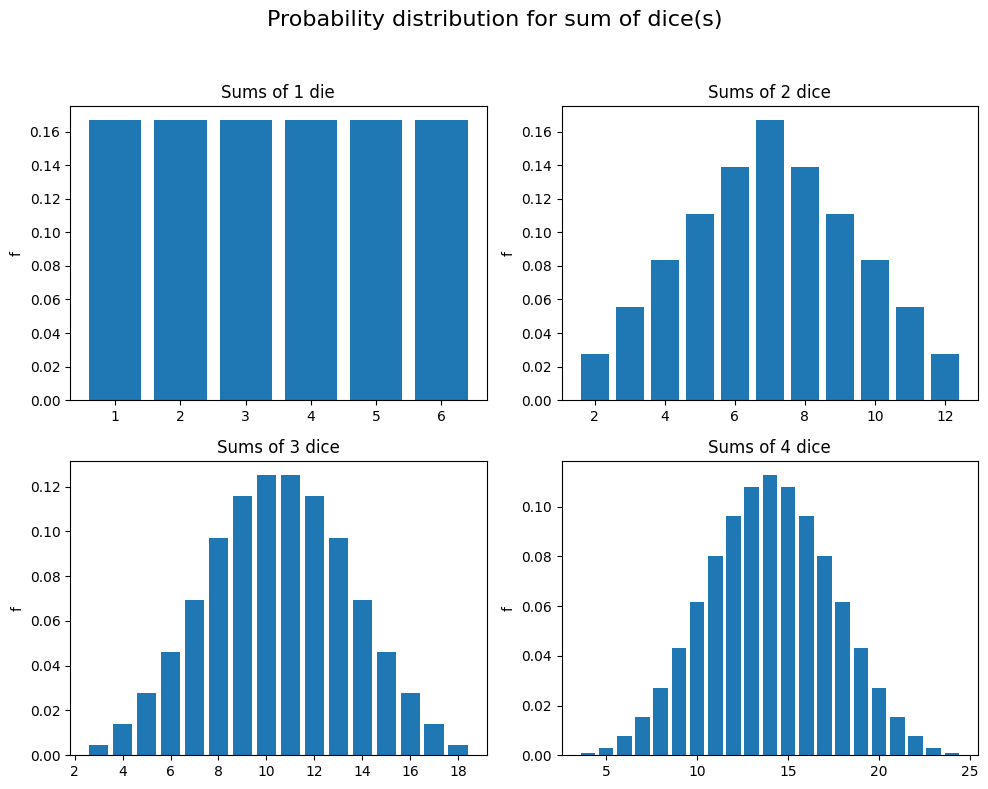

In [17]:
import numpy as np
from collections import Counter

dice = np.array([1,2,3,4,5,6])

grid1, grid2, grid3, grid4 = np.meshgrid(dice, dice, dice, dice)

combinations = np.vstack((grid1.ravel(), grid2.ravel(), grid3.ravel(), grid4.ravel())).T

print(combinations)

sums = np.sum(combinations, axis=1)
count_occurrences4 = Counter(sums)

total_dice_throws = 0

for key, count in count_occurrences4.items():
    total_dice_throws += count

frequency_dict4 = {}

# Calculate and add frequencies for each key
for key, count in count_occurrences4.items():
    frequency = count / total_dice_throws
    frequency_dict4[key] = frequency

frequency_sum = 0
for value in frequency_dict4.values():
    frequency_sum += value
print(f"Sum of all frequencies: {frequency_sum}")

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Overall title
fig.suptitle("Probability distribution for sum of dice(s)", fontsize=16)

# Subplot 1: 1 dice
axs[0, 0].bar(range(1, 7), [1/6 for i in range(6)])
axs[0, 0].set_ylabel('f')  # Add y-axis label
axs[0, 0].set_title('Sums of 1 die')  

# Subplot 2: 2 dice
axs[0, 1].bar(count_occurrences2.keys(), frequency_dict2.values())
axs[0, 1].set_ylabel('f')  # Add y-axis label
axs[0, 1].set_title('Sums of 2 dice')  

# Subplot 3: 3 dice
axs[1, 0].bar(count_occurrences3.keys(), frequency_dict3.values())
axs[1, 0].set_ylabel('f')  # Add y-axis label
axs[1, 0].set_title('Sums of 3 dice')  

# Subplot 4: 4 dice
axs[1, 1].bar(count_occurrences4.keys(), frequency_dict4.values())
axs[1, 1].set_ylabel('f')  # Add y-axis label
axs[1, 1].set_title('Sums of 4 dice')  

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

*The shape resembles a normal bell curve more and more*

--- 
## 3. Monte Carlo simulation (**)

This task has been done in earlier exercise, but now you should do this without any loops. Note that this has enormous performance gain compared to using loops. 

&nbsp; a) Simulate 500000 uniformly distributed points between -1 and 1, $X\sim U(-1,1)$. Now calculate the Euclidean distances between each point and the origin (0,0), $d_i = \sqrt{x_i^2 + y_i^2}$. For $d_i < 1$ plot the point with one color, and for $d_i > 1$ plot the point in another color, $i = \{1,\ldots, 500000\}$.  (**)

&nbsp; b) Calculate the fraction between number of inner points and number of outer points. What do you this will converge to when number of points reaches infinity? (**)


<details>

<summary>Hint</summary>

a) 

Read about numpy random and see if there are some useful methods to use. Also read about 

```
np.linalg.norm()
```

b)

Think in terms of theoretical areas.

</details>

<details>

<summary>Answer</summary>


a) 

<img src="../Assets/MC_simulation_500k.png" width = 300>


b) 

0.784724

No answer here, try to prove it theoretically. 


</details>

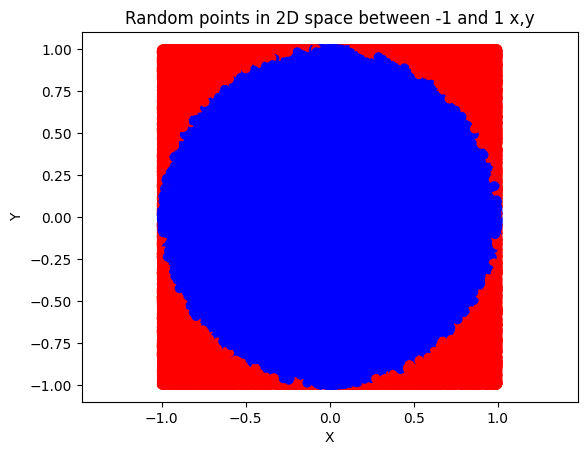

Fraction of blue/red points: 1.0, red/blue points: 1.0
The fraction of blue points compared to all points: 1.0


NameError: name 'math' is not defined

In [19]:
import numpy as np

xs = 2*np.random.random(500000)-1
ys = 2*np.random.random(500000)-1

dists = np.sqrt(xs**2 + ys**2)

color_array = np.where(dists < 1, 'blue', 'red')

# Create a figure and a subplot
fig, ax = plt.subplots()

# Plot the data points
ax.scatter(xs,ys,c=color_array)

# Add labels and titles to the plot
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Random points in 2D space between -1 and 1 x,y")

# Show the plot
plt.axis('equal')
plt.show()


In [24]:
import math

blue_count = np.count_nonzero(color_array == 'blue')
red_count = np.count_nonzero(color_array == 'red')

print(f"Fraction of blue/red points: {blue_count / red_count}, red/blue points: {red_count / blue_count}")
print(f"The fraction of blue points compared to all points: {blue_count / dists.__len__()}")
print(f"\nThe fraction of blue points should converge to {math.pi/4 = },\nas the area of the square is 4, and the area of the circle is Pi.")


Fraction of blue/red points: 3.658052375140906, red/blue points: 0.2733695140057913
The fraction of blue points compared to all points: 0.785318

The fraction of blue points should converge to math.pi/4 = 0.7853981633974483,
as the area of the square is 4, and the area of the circle is Pi.
